## Reading the midi File and finding the chords

In [1]:
from Tonnetz_Select import *

In [8]:
chordListConnectNoDoubles, Tonnetz = fromMidiToPCS('schoenberg_sechs_klavierstucke_19_1_(c)simonetto.mid')

The number of chords found is :  257
The Tonnetz Selected is : T147 
The number of represented chords in this system is : 120
After duplicate reduction the number of chords is : 243
[3, 4, 5, 8, 9, 11]
[0, 9, 6, 7]
[2, 11, 6]
[11, 2, 3, 6]
[0, 3, 5, 9, 10]
[1, 4, 9, 7]
[9, 2, 11]
[1, 2, 5, 8, 9, 11]
[9, 2, 11]
[3, 2, 11, 7]
[2, 3, 7]
[2, 3, 5, 7, 10, 11]
243


## Trajectory Calculations

In [9]:
import TrajectoryCalculations as traj

In [10]:
TrajectoryPoints = traj.Trajectory(chordListConnectNoDoubles, (0,0), Tonnetz)
TrajectoryPointsLookBefore = traj.TrajectoryLookBefore(chordListConnectNoDoubles, (0,0), Tonnetz)

[7, 9, 6, 0] dict_items([(7, (-5, 0)), (6, (-5, -1)), (0, (-4, 1))]) (-5, 0) 5 4 3


RuntimeError: Infinite Loop

### Let's find the edges

In [11]:
import itertools as itt
def TrajectoryNoteEdges(TrajectoryPoints, Tonnetz):
    TotalEdges = []
    for dicts in TrajectoryPoints:
        chordEdges = []
        l = list(itt.product(dicts.values(), dicts.values()))
        for couple in l:
            if abs(couple[0][0] - couple[1][0]) <= 1 and abs(couple[0][1] - couple[1][1]) <= 1 :
                chordEdges.append(couple)
        TotalEdges.append(chordEdges)
    return TotalEdges

In [12]:
TrajectoryV1Edges = TrajectoryNoteEdges(TrajectoryPoints, Tonnetz)
TrajectoryV2Edges = TrajectoryNoteEdges(TrajectoryPointsLookBefore, Tonnetz)

### Let's plot that!

First just Points

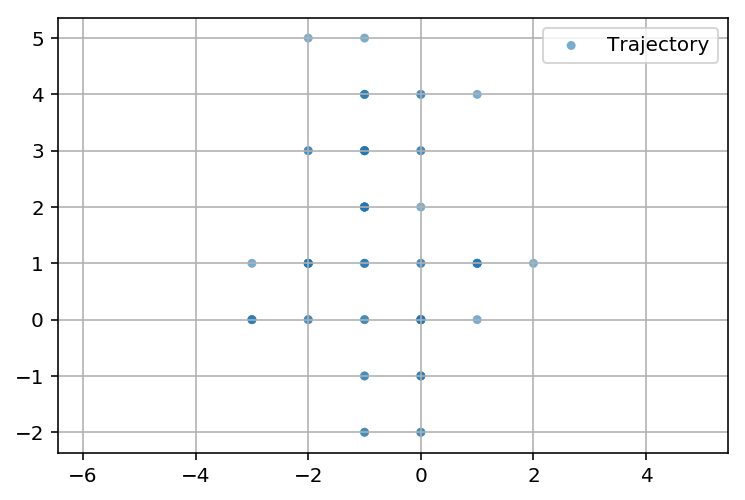

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()


axeX = []
axeY = []

axeX2 = []
axeY2 = []

for dicts in TrajectoryPointsLookBefore:
    for el in dicts:
        x, y = dicts[el]
        axeX2.append(x)
        axeY2.append(y)
    
for dicts in TrajectoryPoints:
    for el in dicts:
        x, y = dicts[el]
        axeX.append(x)
        axeY.append(y)       

#change these to adapt the grid :        
        
# ax.set_xticks(np.arange(-40, 40, 1)) 
# ax.set_yticks(np.arange(-40, 40, 1))        

# for el in TrajectoryV1Edges:
#     for couple in el :
#         (p1x,p1y), (p2x,p2y) = couple
#         line, = ax.plot((p1x,p2x), (p1y,p2y), '-bo', alpha=0.1)

# for el in TrajectoryV2Edges:
#     for couple in el :
#         (p1x,p1y), (p2x,p2y) = couple
#         line, = ax.plot((p1x,p2x), (p1y,p2y), '-ro', alpha=0.1)
        
        
# ax.scatter(axeX2, axeY2, c='tab:orange', s=20, label='Trajectory Look Before', alpha=0.6, edgecolors='none')
ax.scatter(axeX, axeY, c='tab:blue', s=20, label='Trajectory', alpha=0.6, edgecolors='none')

ax.legend()
plt.grid()
plt.axis('equal')


plt.show()

Let's try graph libraries

In [19]:
import networkx as nx
G = nx.Graph()

In [20]:
def NotesToEdges(TrajectoryPoints, TrajectoryNoteEdges, Graph):
    listofPoints = []
    for i, dicts in enumerate(TrajectoryPoints):
        for el in dicts:
            Graph.add_node(dicts[el])
        for j in TrajectoryV1Edges[i]:
            Graph.add_edge(j[0], j[1])
    return Graph

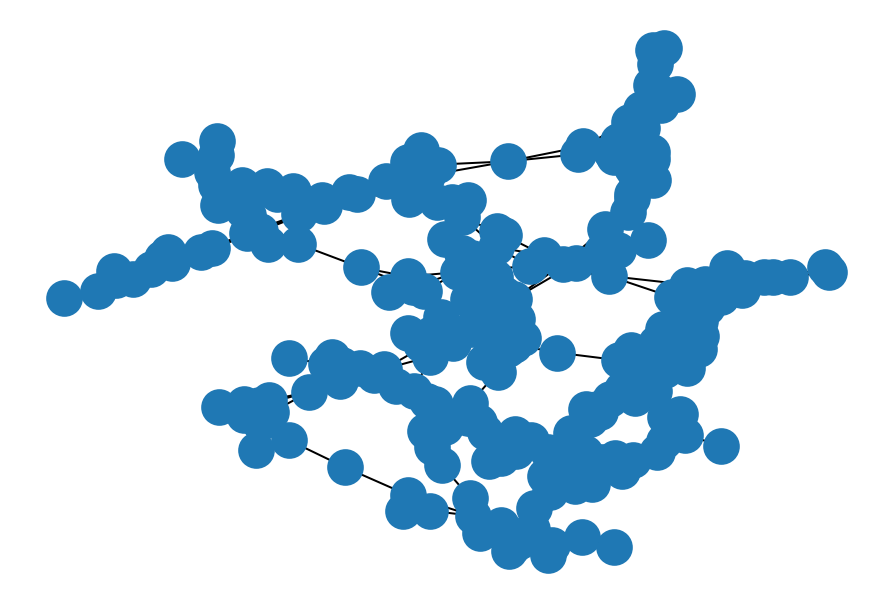

In [21]:
newGraph = NotesToEdges(TrajectoryPoints, TrajectoryNoteEdges, G)
nx.draw(newGraph)
plt.show()

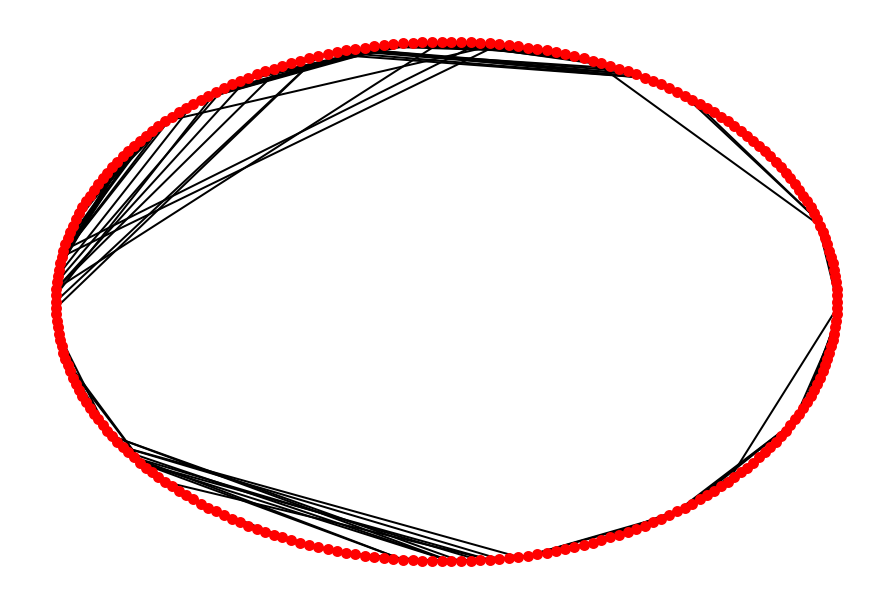

In [22]:
options = {
...     'node_color': 'red',
...     'node_size': 20,
...     'width': 1,
... }
nx.draw_circular(newGraph, **options)

Plotting with Delaunay Triangulations either computes a complete graph which is not hepful either it need more than three points to compute.

In [23]:
from scipy.spatial import Delaunay

def DelaunaySimplices(TrajectoryPoints):
    fig, ax = plt.subplots()
    plt.axis('equal')
    ax.grid(True) 
    for dicts in TrajectoryPoints:
        l = []
        for el in dicts:
            l.append(dicts[el])
        points = np.array(l)
        tri = Delaunay(points)
        plt.triplot(points[:,0], points[:,1], tri.simplices)
        plt.plot(points[:,0], points[:,1], 'o')
    plt.show()


QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 4)

While executing:  | qhull d Q12 Qbb Qt Qz Qc
Options selected for Qhull 2015.2.r 2016/01/18:
  run-id 1531446073  delaunay  Q12-no-wide-dup  Qbbound-last  Qtriangulate
  Qz-infinity-point  Qcoplanar-keep  _pre-merge  _zero-centrum  Qinterior-keep


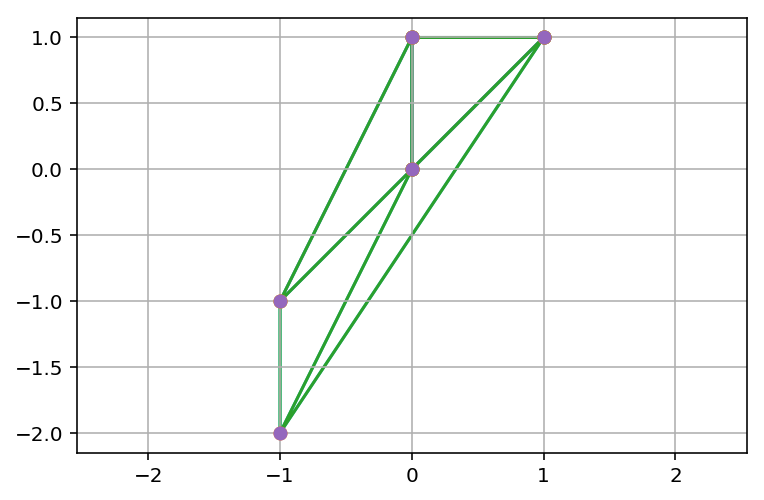

In [24]:
DelaunaySimplices(TrajectoryPoints)

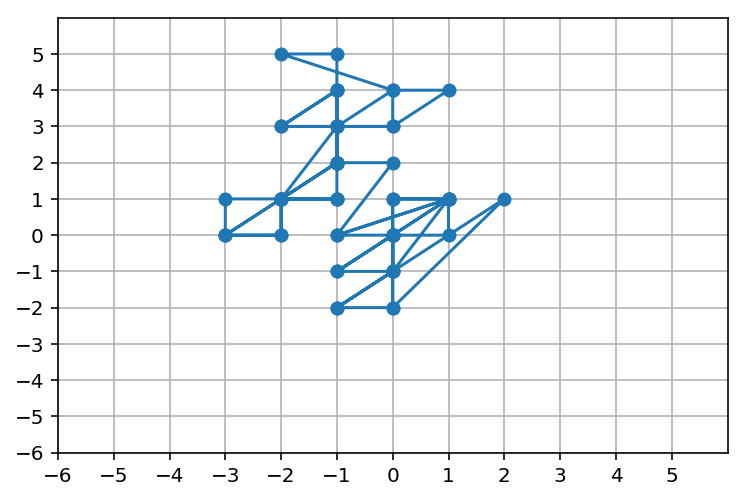

In [16]:
from matplotlib.animation import FuncAnimation
import numpy as np


def aniPlot(axeX, axesY, limitLow, limitHigh):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(limitLow, limitHigh, 1)) 
    ax.set_yticks(np.arange(limitLow, limitHigh, 1))  
    ax.grid()
    xdata, ydata = [], []
    N = len(axeX)
    ln, = plt.plot([], [], '-o')

    def init():
        ax.set_xlim(limitLow, limitHigh)
        ax.set_ylim(limitLow, limitHigh)
        return ln,

    def update(frame):
        xdata.append(axeX[frame])
        ydata.append(axeY[frame])
        ln.set_data(xdata, ydata)
        return ln,

    ani = FuncAnimation(fig, update, frames=np.arange(N),
                        init_func=init, blit=True)

    plt.rc('animation', html='html5')
    return ani

    
aniPlot(axeX, axeY, -6, 6)

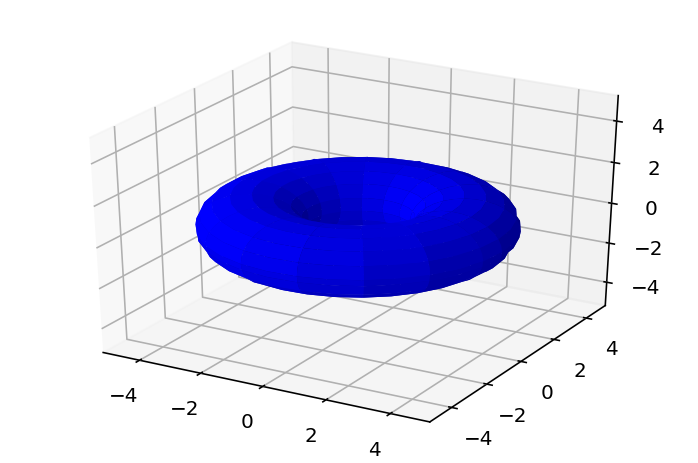

In [41]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate torus mesh
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = 1.5, 3.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.plot_surface(X, Y, Z, color = 'b', rstride = 2, cstride = 2)
plt.show()